In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### Melakukan import pada library yang akan digunakan

##### Melakukan read pada citra yang akan digunakan dan langsung menampilkan

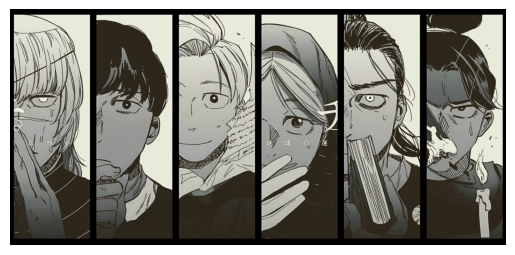

In [2]:
img = plt.imread('Assets/aktivis.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
badeni = img[:, 0:453, :]
albert = img[:, 453:906, :]
rafal = img[:, 906:1359, :]
jolenta = img[:, 1359:1812, :]
oczy = img[:, 1812:2265, :]
draka = img[:, 2265:2718, :]

##### Pembagian gambar untuk di urutkan ulang

##### Proses pengurutan ulang gambar yang sudah dibagi menjadi 6 bagian

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

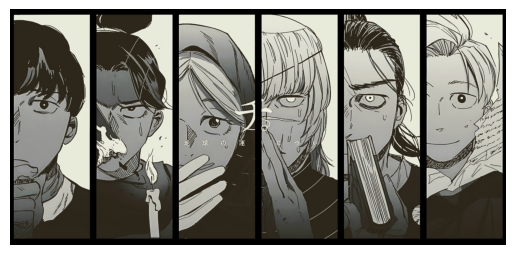

In [4]:
orb = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
orb[:, 0:453, :] = albert
orb[:, 453:906, :] = draka
orb[:, 906:1359, :] = jolenta
orb[:, 1359:1812, :] = badeni
orb[:, 1812:2265, :] = oczy
orb[:, 2265:2718, :] = rafal 
plt.imshow(orb)
plt.axis('off')

In [5]:
def ekualisasi(gambar):
  abu_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
  t, l = abu_abu.shape
  total = t * l

  histogram = [0] * 256
  for i in range(t):
    for j in range(l):
      nilai = abu_abu[i, j]
      histogram[nilai] += 1

  cdf = [0] * 256
  cdf[0] = histogram[0]
  for i in range(1, 256):
    cdf[i] = cdf[i - 1] + histogram[i]

  cdf_minimal = min(x for x in cdf if x > 0)
  nilai_baru = [0] * 256
  for i in range(256):
    nilai_baru[i] = round((cdf[i] - cdf_minimal) / (total - cdf_minimal) * 255)

  result = np.zeros((t, l), dtype=np.uint8)
  for i in range(t):
    for j in range(l):
      result[i, j] = nilai_baru[abu_abu[i, j]]

  return result

### Fungsi Ekualisasi

##### Fungsi ekualisasi di atas, memiliki beberapa buah looping di dalamnya. pertama program akan mengubah gambar menjadi gryscale, setelah itu mencari panjang dan lebar gambar, kemudian menggunakan looping untuk menghitung jumlah dari setiap intensitas piksel, kemudian menggunakan looping juga untuk menghitung cdf kumulatif dari setiap intensitas, lalu menggunakan np.zeros untuk membuat kotak kosong yang akan diisi dengan intensitas baru setelah ekualisasi dengan looping

### Pemanggilan Ekualisasi

##### Menggunakan fungsi ekualisasi pada gambar serta menampilkan hasil ekualisasi

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

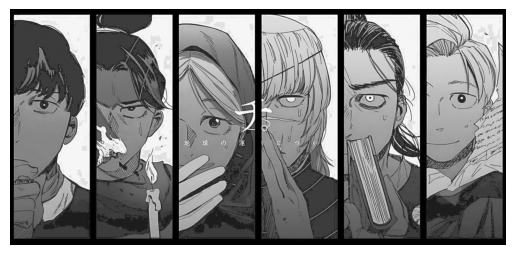

In [6]:
diekualisasi_1 = ekualisasi(orb)
plt.imshow(diekualisasi_1, cmap='gray')
plt.axis('off')

In [7]:
def histogramo(gambar, tranparansi, warna):
    pixelCanvas = [i for i in range(256)]
    arrayPixel = np.zeros(256)
    for i in range(gambar.shape[0]):
        for j in range(img.shape[1]):
            kecerahan = gambar[i,j]
            arrayPixel[kecerahan]+=1
    persentasi_array = arrayPixel/np.sum(arrayPixel)
    plt.bar(pixelCanvas, persentasi_array, alpha=tranparansi, color=warna)
    plt.title("Histogramo")


### Fungsi Histogram

##### Membuat fungsi yang akan menampilkan histogram untuk perbandingan histogram gambar yang akan di ekualisasi

### Pemanggilan Histogram

##### Memanggil fungsi histogram untuk menampilkan perbandingan histogram dari kedua gambar, yaitu gambar asli dan gambar yang sudah di ekualisasi

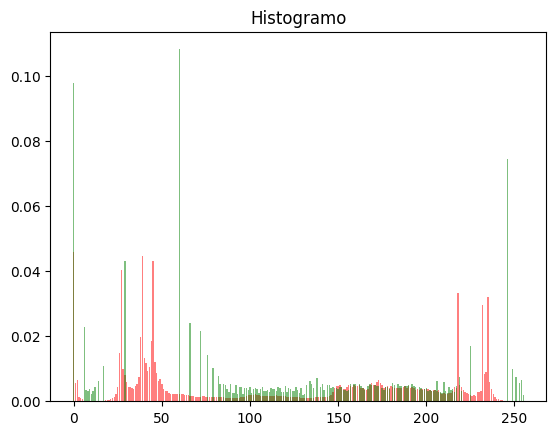

In [8]:
histogramo(orb, 0.5, warna='red')
histogramo(diekualisasi_1, 0.5, warna='green')

In [9]:
def spesifikasi(gambar, gambar_ref):
    if len(gambar.shape) == 3:
        gambar = cv2.cvtColor(gambar, cv2.COLOR_RGB2GRAY)
    if len(gambar_ref.shape) == 3:
        gambar_ref = cv2.cvtColor(gambar_ref, cv2.COLOR_RGB2GRAY)

    hist = [0]*256
    hist_ref = [0]*256
    
    for pixel in gambar.ravel(): hist[pixel] += 1
    for pixel in gambar_ref.ravel(): hist_ref[pixel] += 1
    
    cdf, cdf_ref = [0]*256, [0]*256
    cdf[0], cdf_ref[0] = hist[0], hist_ref[0]
    
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + hist[i]
        cdf_ref[i] = cdf_ref[i-1] + hist_ref[i]
    
    cdf_norm = [x/cdf[-1] for x in cdf]
    cdf_ref_norm = [x/cdf_ref[-1] for x in cdf_ref]
    
    mapping = [0]*256
    for i in range(256):
        closest = min(range(256), key=lambda j: abs(cdf_norm[i]-cdf_ref_norm[j]))
        mapping[i] = closest
    
    result = np.zeros_like(gambar)
    for i in range(gambar.shape[0]):
        for j in range(gambar.shape[1]):
            result[i,j] = mapping[gambar[i,j]]
    
    return result

### FUNGSI SPESIFIKASI

##### Memiliki struktur yang sama seperti ekualisasi tetapi pada struktur akhir fungsi memiliki mapping atau pemetaan yang berfungsi untuk melakukan pemetaan nilai piksel yang akan berubah dari gambar asli menjadi sesuai dengan perhitungan menggunakan looping untuk mencari selisih dan memilih nilai terdekat untuk digunakan pada gambar yang baru

### PEMANGGILAN SPESIFIKASi

##### Pertama program akan memanggil dan menyimpan gambar propaganda dan draka, setelah itu, kedua gambar akan digunakan sebagai citra target untuk spesifikasi menggunakan fungsi yang sudah dibuat.

(np.float64(-0.5), np.float64(2721.5), np.float64(1293.5), np.float64(-0.5))

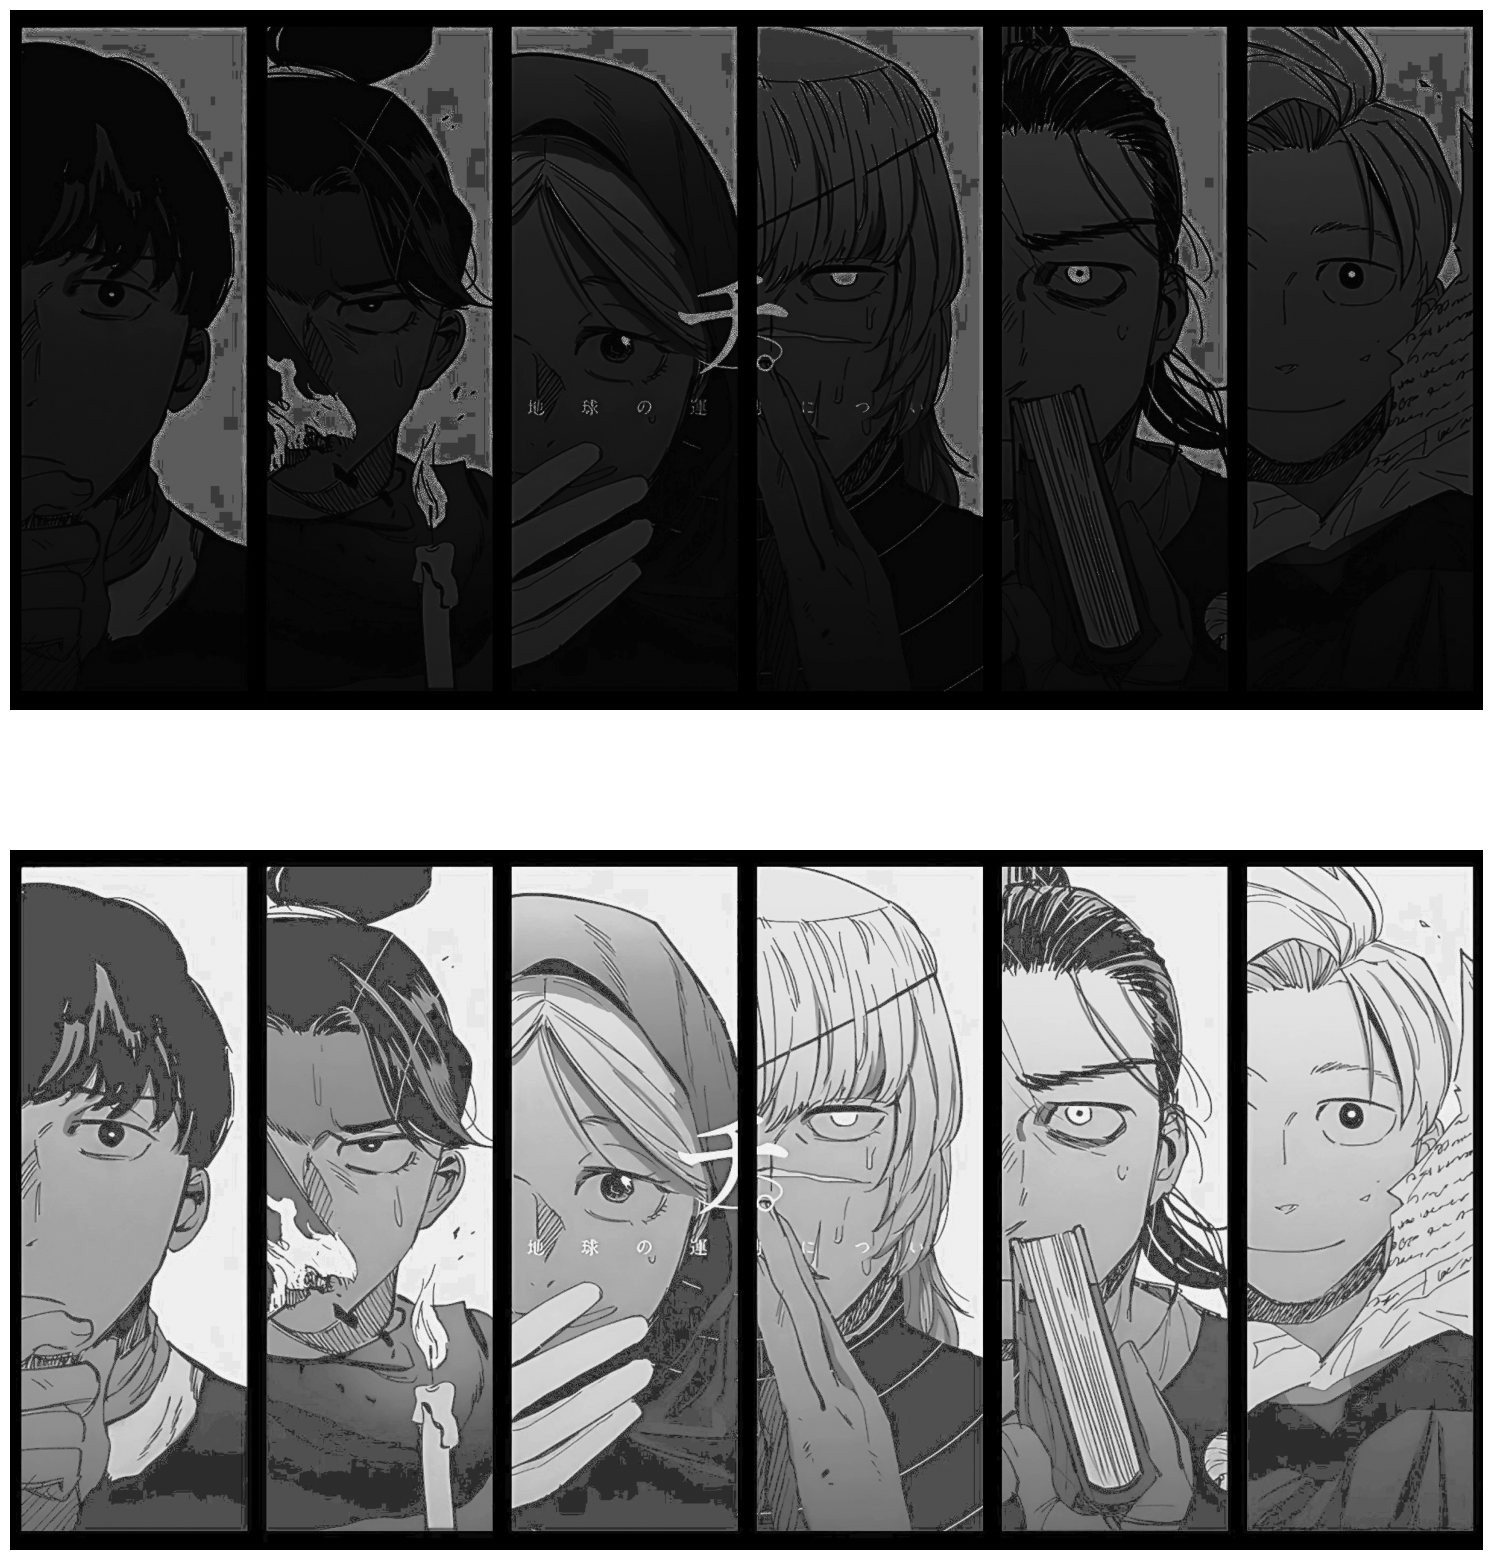

In [10]:
propaganda = plt.imread('Assets/propaganda.jpg', )
draka = plt.imread('Assets/draka.jpg')

plt.figure(figsize=(20, 20))

plt.subplot(2,1,1)
spesifik_propaganda = spesifikasi(diekualisasi_1, propaganda)
plt.imshow(spesifik_propaganda, cmap="gray")
plt.axis('off')
plt.subplot(2,1,2)
spesifik_draka = spesifikasi(diekualisasi_1, draka)
plt.imshow(spesifik_draka, cmap="gray")
plt.axis('off')

### Kombinasi Spesifikasi

##### Membuat kotak kosong menggunakan library `numpy` yaitu `np.zeros_like`, dimana fungsi ini akan membuat kotak yang akan menyesuaikan ukuran dengan gambar atau image yanng dipilih. Disini saya menggunakan ukuran image `diekualisasi_1`, setelah itu mendefinisikan type agar menggunakan integer.

##### Setelah membuat kotak kosong, program akan menampilkan gambar yang sudah di-input secara menual baik urutan maupun spesifikasi pada piksel yang di inginkan.

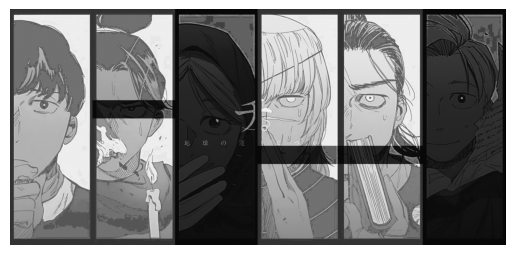

In [11]:
kombinasi = np.zeros_like(diekualisasi_1, dtype=np.uint8)
kombinasi[:, 0:453] = spesifik_draka[:, 0:453]
kombinasi[0:500, 453:906] = spesifik_draka[0:500, 453:906]
kombinasi[500:600, 453:906] = spesifik_propaganda[500:600, 453:906]
kombinasi[600:, 453:906] = spesifik_draka[600:, 453:906]
kombinasi[:, 906:1359] = spesifik_propaganda[:, 906:1359]
kombinasi[0:750, 1359:1812] = spesifik_draka[0:750, 1359:1812]
kombinasi[750:850, 1359:1812] = spesifik_propaganda[750:850, 1359:1812]
kombinasi[850:, 1359:1812] = spesifik_draka[850:, 1359:1812]
kombinasi[0:750, 1812:2265] = spesifik_draka[0:750, 1812:2265]
kombinasi[750:850, 1812:2265] = spesifik_propaganda[750:850, 1812:2265]
kombinasi[850:, 1812:2265] = spesifik_draka[850:, 1812:2265]
kombinasi[:, 2265:2718] = spesifik_propaganda[:, 2265:2718]

plt.imshow(kombinasi, cmap="gray")
plt.axis('off')
plt.show()

### Spesifikasi Kedua

##### membuat kotak kosong dengan `no.zeros_like`
##### Mengatur karakter pertama menggunakan spesifikasi draka, lalu karakter kedua hingga terakhir menggunakan spesifikasi propaganda secara manual..

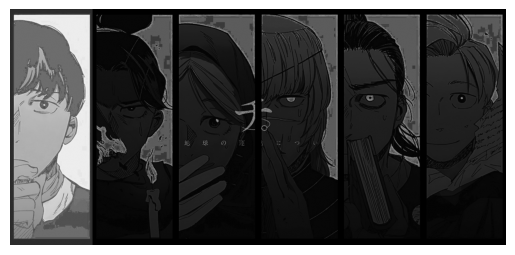

In [12]:
kombinasi2 = np.zeros_like(diekualisasi_1, dtype=np.uint8)
kombinasi2[:, 0:453] = spesifik_draka[:, 0:453]
kombinasi2[:, 453:] = spesifik_propaganda[:, 453:]
plt.imshow(kombinasi2, cmap="gray")
plt.axis('off')
plt.show()
